In [1]:
"""
🔍 RTX 4070 + CUDA 13.1 환경 테스트
Python 3.12.10
"""

import sys

print("="*60)
print("🔍 머신러닝 환경 테스트")
print("="*60)

# ============================================
# 1️⃣ Python 환경 확인
# ============================================
print("\n📌 Python 환경:")
print(f"   버전: {sys.version}")
print(f"   실행 경로: {sys.executable}")

# ============================================
# 2️⃣ 필수 라이브러리 확인
# ============================================
print("\n📌 라이브러리 버전 확인:")

try:
    import numpy as np
    print(f"   ✅ NumPy: {np.__version__}")
except ImportError:
    print("   ❌ NumPy 설치되지 않음")

try:
    import pandas as pd
    print(f"   ✅ Pandas: {pd.__version__}")
except ImportError:
    print("   ❌ Pandas 설치되지 않음")

try:
    import sklearn
    print(f"   ✅ Scikit-learn: {sklearn.__version__}")
except ImportError:
    print("   ❌ Scikit-learn 설치되지 않음")

try:
    import matplotlib
    print(f"   ✅ Matplotlib: {matplotlib.__version__}")
except ImportError:
    print("   ❌ Matplotlib 설치되지 않음")

# ============================================
# 3️⃣ PyTorch 및 CUDA 확인
# ============================================
print("\n📌 PyTorch 환경:")

try:
    import torch
    print(f"   ✅ PyTorch 버전: {torch.__version__}")
    print(f"   ✅ CUDA 사용 가능: {torch.cuda.is_available()}")
    
    if torch.cuda.is_available():
        print(f"   ✅ CUDA 버전: {torch.version.cuda}")
        print(f"   ✅ cuDNN 버전: {torch.backends.cudnn.version()}")
        print(f"   ✅ GPU 개수: {torch.cuda.device_count()}")
        print(f"   ✅ 현재 GPU: {torch.cuda.current_device()}")
        print(f"   ✅ GPU 이름: {torch.cuda.get_device_name(0)}")
        
        # GPU 메모리 정보
        props = torch.cuda.get_device_properties(0)
        print(f"\n💾 GPU 메모리 정보:")
        print(f"   총 메모리: {props.total_memory / 1024**3:.2f} GB")
        print(f"   할당된 메모리: {torch.cuda.memory_allocated(0) / 1024**3:.2f} GB")
        print(f"   예약된 메모리: {torch.cuda.memory_reserved(0) / 1024**3:.2f} GB")
        
        # Compute Capability
        print(f"   Compute Capability: {props.major}.{props.minor}")
        
        # cuDNN 벤치마크 상태
        print(f"\n⚙️ 최적화 설정:")
        print(f"   cuDNN 벤치마크: {torch.backends.cudnn.benchmark}")
        print(f"   cuDNN 활성화: {torch.backends.cudnn.enabled}")
        
        # GPU 연산 테스트
        print(f"\n🧪 GPU 연산 테스트:")
        import time
        
        # Warmup
        x = torch.randn(5000, 5000).cuda()
        y = torch.randn(5000, 5000).cuda()
        for _ in range(3):
            _ = torch.matmul(x, y)
        torch.cuda.synchronize()
        
        # 측정
        x = torch.randn(10000, 10000).cuda()
        y = torch.randn(10000, 10000).cuda()
        
        start = time.time()
        z = torch.matmul(x, y)
        torch.cuda.synchronize()
        end = time.time()
        
        print(f"   10000x10000 행렬 곱셈: {(end-start)*1000:.2f}ms")
        
        # Mixed Precision 테스트
        x_fp16 = x.half()
        y_fp16 = y.half()
        
        start = time.time()
        z_fp16 = torch.matmul(x_fp16, y_fp16)
        torch.cuda.synchronize()
        end = time.time()
        
        print(f"   FP16 행렬 곱셈: {(end-start)*1000:.2f}ms")
        
        print(f"\n✅ GPU가 정상적으로 작동합니다! 🚀")
        
    else:
        print("\n❌ CUDA를 사용할 수 없습니다!")
        print("드라이버와 CUDA Toolkit을 확인하세요.")
        
except ImportError:
    print("   ❌ PyTorch가 설치되지 않았습니다!")

# ============================================
# 4️⃣ TensorFlow 확인
# ============================================
print("\n📌 TensorFlow 환경:")

try:
    import tensorflow as tf
    print(f"   ✅ TensorFlow 버전: {tf.__version__}")
    
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print(f"   ✅ GPU 개수: {len(gpus)}")
        for i, gpu in enumerate(gpus):
            print(f"   ✅ GPU {i}: {gpu.name}")
    else:
        print("   ⚠️ GPU를 찾을 수 없습니다")
        
except ImportError:
    print("   ❌ TensorFlow가 설치되지 않았습니다!")

# ============================================
# 5️⃣ 추가 라이브러리 확인
# ============================================
print("\n📌 추가 라이브러리:")

libraries = {
    'transformers': 'Transformers',
    'xgboost': 'XGBoost',
    'lightgbm': 'LightGBM',
    'cv2': 'OpenCV',
    'PIL': 'Pillow',
    'tqdm': 'TQDM',
    'wandb': 'Weights & Biases',
    'optuna': 'Optuna'
}

for module, name in libraries.items():
    try:
        __import__(module)
        print(f"   ✅ {name}")
    except ImportError:
        print(f"   ⚠️ {name} (선택사항)")

# ============================================
# 6️⃣ Jupyter 확인
# ============================================
print("\n📌 Jupyter 환경:")

try:
    import jupyter
    print(f"   ✅ Jupyter 설치됨")
    print(f"   실행 명령어: jupyter lab")
except ImportError:
    print("   ❌ Jupyter가 설치되지 않았습니다!")

# ============================================
# 최종 결과
# ============================================
print("\n" + "="*60)
print("✅ 환경 테스트 완료!")
print("="*60)

try:
    import torch
    if torch.cuda.is_available():
        print("\n🎉 모든 준비가 완료되었습니다!")
        print("이제 머신러닝/딥러닝 작업을 시작할 수 있습니다.")
        print("\n💡 다음 단계:")
        print("   - VS Code 또는 Cursor에서 Python 파일 생성")
        print("   - Jupyter Lab 실행: jupyter lab")
        print("   - GPU 모니터링: nvidia-smi -l 1")
    else:
        print("\n⚠️ CUDA 설정이 필요합니다.")
        print("드라이버와 CUDA Toolkit을 확인하세요.")
except:
    print("\n⚠️ PyTorch 설치가 필요합니다.")

print("\n" + "="*60)

🔍 머신러닝 환경 테스트

📌 Python 환경:
   버전: 3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]
   실행 경로: c:\Users\sck32\AppData\Local\Programs\Python\Python312\python.exe

📌 라이브러리 버전 확인:
   ✅ NumPy: 2.2.6
   ✅ Pandas: 2.2.3
   ✅ Scikit-learn: 1.5.2
   ✅ Matplotlib: 3.9.2

📌 PyTorch 환경:
   ✅ PyTorch 버전: 2.4.1+cu124
   ✅ CUDA 사용 가능: True
   ✅ CUDA 버전: 12.4
   ✅ cuDNN 버전: 90100
   ✅ GPU 개수: 1
   ✅ 현재 GPU: 0
   ✅ GPU 이름: NVIDIA GeForce RTX 4070

💾 GPU 메모리 정보:
   총 메모리: 11.99 GB
   할당된 메모리: 0.00 GB
   예약된 메모리: 0.00 GB
   Compute Capability: 8.9

⚙️ 최적화 설정:
   cuDNN 벤치마크: False
   cuDNN 활성화: True

🧪 GPU 연산 테스트:
   10000x10000 행렬 곱셈: 105.30ms
   FP16 행렬 곱셈: 148.07ms

✅ GPU가 정상적으로 작동합니다! 🚀

📌 TensorFlow 환경:
   ❌ TensorFlow가 설치되지 않았습니다!

📌 추가 라이브러리:
   ✅ Transformers
   ✅ XGBoost
   ✅ LightGBM
   ✅ OpenCV
   ✅ Pillow
   ✅ TQDM
   ⚠️ Weights & Biases (선택사항)
   ⚠️ Optuna (선택사항)

📌 Jupyter 환경:
   ✅ Jupyter 설치됨
   실행 명령어: jupyter lab

✅ 환경 테스트 완료!

🎉 모든 준비가 완료되었습니다!
이제 머신러닝/딥

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import os

# GPU 최적화 설정 (RTX 6000 또는 현재 GPU 활용)
def setup_cuda():
    if torch.cuda.is_available():
        # 연산 속도 향상을 위한 벤치마크 활성화
        torch.backends.cudnn.benchmark = True
        print(f"✅ GPU 사용 가능: {torch.cuda.get_device_name(0)}")
        print(f"메모리 용량: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    else:
        print("⚠️ GPU를 사용할 수 없습니다. CPU 모드로 동작합니다.")

setup_cuda()

# VitalDB 데이터 로드 예시 (전처리 로직 포함 예정)
def load_vital_data(file_path):
    # 실제 데이터 로드 시 128GB RAM을 활용해 대용량 처리가 가능합니다.
    print(f"데이터 로드 중: {file_path}")
    pass

✅ GPU 사용 가능: NVIDIA GeForce RTX 4070
메모리 용량: 12.88 GB


In [3]:
import torch
import torchvision

# GPU 확인
device = torch.device('cuda')
print(f"🔥 GPU: {torch.cuda.get_device_name(0)}")

# ResNet50 모델 로드
model = torchvision.models.resnet50(pretrained=True).to(device)
model.eval()

# 샘플 이미지로 추론
x = torch.randn(32, 3, 224, 224).to(device)
with torch.no_grad():
    output = model(x)

print(f"✅ 배치 추론 완료! Output shape: {output.shape}")

🔥 GPU: NVIDIA GeForce RTX 4070


c:\Users\sck32\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sck32\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ 배치 추론 완료! Output shape: torch.Size([32, 1000])


In [4]:
import torch
import platform
import psutil

class CudaOptimizer:
    @staticmethod
    def setup():
        # PyTorch의 cuDNN 벤치마크 활성화 (동적 입력 크기가 아닐 때 속도 대폭 향상)
        if torch.cuda.is_available():
            torch.backends.cudnn.benchmark = True
            torch.backends.cuda.matmul.allow_tf32 = True  # Ampere/Blackwell 아키텍처 가속
            print("✅ CUDA 최적화 설정 완료: cuDNN Benchmark 및 TF32 활성화")
        else:
            print("⚠️ CUDA를 사용할 수 없습니다.")

    @staticmethod
    def print_system_info():
        print(f"🖥️ 운영체제: {platform.system()} {platform.release()}")
        print(f"🧠 CPU: {platform.processor()} (i9-14900K 급)")
        # 128GB RAM 확인
        mem = psutil.virtual_memory()
        print(f"📊 RAM: {mem.total / (1024**3):.2f} GB")
        if torch.cuda.is_available():
            print(f"🎮 GPU: {torch.cuda.get_device_name(0)}")

    @staticmethod
    def benchmark_gpu():
        if not torch.cuda.is_available(): return
        print("🚀 GPU 벤치마크 테스트 중...")
        # 간단한 행렬 연산으로 성능 체크
        x = torch.randn(5000, 5000).cuda()
        start = torch.cuda.Event(enable_timing=True)
        end = torch.cuda.Event(enable_timing=True)
        start.record()
        torch.matmul(x, x)
        end.record()
        torch.cuda.synchronize()
        print(f"⏱️ 5000x5000 행렬 연산 속도: {start.elapsed_time(end):.2f} ms")

# 모듈처럼 사용하기 위해 인스턴스 생성
cuda_optimizer = CudaOptimizer()

# --- 여기서부터 기존 코드 실행 ---
cuda_optimizer.setup()
cuda_optimizer.print_system_info()
cuda_optimizer.benchmark_gpu()

✅ CUDA 최적화 설정 완료: cuDNN Benchmark 및 TF32 활성화
🖥️ 운영체제: Windows 11
🧠 CPU: Intel64 Family 6 Model 183 Stepping 1, GenuineIntel (i9-14900K 급)
📊 RAM: 127.77 GB
🎮 GPU: NVIDIA GeForce RTX 4070
🚀 GPU 벤치마크 테스트 중...
⏱️ 5000x5000 행렬 연산 속도: 8.59 ms


In [5]:
import torch
import torch.nn as nn

# 1D-CNN을 활용한 파형 특징 추출기
class WaveformEncoder(nn.Module):
    def __init__(self):
        super(WaveformEncoder, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        )
        
    def forward(self, x):
        return self.conv_layers(x)

# 심박출량 추정 메인 모델
class CardiacOutputModel(nn.Module):
    def __init__(self):
        super(CardiacOutputModel, self).__init__()
        self.encoder = WaveformEncoder()
        self.regressor = nn.Sequential(
            nn.Linear(64 * 250, 128), # 입력 길이에 따라 조정 필요
            nn.ReLU(),
            nn.Linear(128, 1) # 최종 CO 수치 출력
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        return self.regressor(x)

print("✅ 심박출량 추정 모델 아키텍처 준비 완료")

✅ 심박출량 추정 모델 아키텍처 준비 완료


In [6]:
import vitaldb
import pandas as pd
import numpy as np

# 1. 메타데이터 로드 (이전 단계에서 성공한 로직)
df_trks = pd.read_csv("https://api.vitaldb.net/trks")

# 2. 동맥압(ART)과 심박출량(CO)이 있는 케이스 찾기
art_cases = set(df_trks[df_trks['tname'].str.contains('ART|ABP', case=False, na=False)]['caseid'])
co_cases = set(df_trks[df_trks['tname'].str.contains('CO', case=False, na=False) & 
                         ~df_trks['tname'].str.contains('CO2', case=False, na=False)]['caseid'])
common_cases = list(art_cases.intersection(co_cases))

print(f"✅ 사용 가능한 공통 케이스 수: {len(common_cases)}")

# 3. 데이터 로드 (함수명 오류 해결을 위한 직접 로드 방식)
if common_cases:
    case_id = common_cases[0]
    case_trks = df_trks[df_trks['caseid'] == case_id]
    
    tname_art = case_trks[case_trks['tname'].str.contains('ART|ABP', case=False)]['tname'].iloc[0]
    tname_co = case_trks[case_trks['tname'].str.contains('CO', case=False) & ~case_trks['tname'].str.contains('CO2')]['tname'].iloc[0]

    print(f"📡 {case_id}번 케이스 로드 중... ({tname_art}, {tname_co})")
    
    # vitaldb 라이브러리의 최신 표준 함수인 VitalFile을 사용합니다.
    # 만약 이마저도 에러가 난다면 데이터 로딩 방식 자체를 URL 직접 접근으로 전환하겠습니다.
    try:
        vf = vitaldb.VitalFile(case_id, [tname_art, tname_co])
        data = vf.to_numpy([tname_art, tname_co], interval=0.01) # 100Hz
        df_sample = pd.DataFrame(data, columns=['ABP', 'CO']).dropna()
    except (AttributeError, Exception):
        # 최후의 수단: VitalDB 클래스 인스턴스를 통한 로드
        data = vitaldb.load_vital(case_id, [tname_art, tname_co], interval=0.01)
        df_sample = pd.DataFrame(data, columns=['ABP', 'CO']).dropna()

    print(f"📊 로드 성공! 데이터 행 수: {len(df_sample)}")
    print(df_sample.head())

✅ 사용 가능한 공통 케이스 수: 3691
📡 1번 케이스 로드 중... (SNUADC/ART, Primus/COMPLIANCE)
📊 로드 성공! 데이터 행 수: 1655
           ABP         CO
35287 -8.80968  35.200001
35903 -8.80968  29.600000
36528 -8.80968  15.000000
37152 -7.82223  23.600000
37789 -7.82223  25.900000


In [7]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class VitalDataset(Dataset):
    def __init__(self, cases, window_size=1000, stride=100):
        self.inputs = []
        self.targets = []
        self.window_size = window_size
        self.stride = stride
        
        # 128GB RAM을 믿고 데이터를 리스트에 쌓습니다.
        self._prepare_data(cases)

    def _prepare_data(self, cases):
        for case_id in cases:
            # 여기에 아까 성공한 데이터 로드 로직을 넣습니다.
            # 데이터 정규화(Min-Max)와 필터링 후 윈도우로 자릅니다.
            pass

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.inputs[idx]).unsqueeze(0) # (1, 1000)
        y = torch.FloatTensor([self.targets[idx]])
        return x, y

print("🚀 128GB RAM 최적화 데이터셋 클래스 설계 완료")

🚀 128GB RAM 최적화 데이터셋 클래스 설계 완료


In [8]:
# 전역 설정 및 하드웨어 최적화 (Mixed Precision)

import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import GradScaler, autocast
from torch.utils.data import DataLoader

# 하드웨어 가속 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaler = GradScaler() # Mixed Precision을 위한 스케일러

print(f"🚀 시스템 준비 완료: {torch.cuda.get_device_name(0)}")

🚀 시스템 준비 완료: NVIDIA GeForce RTX 4070


C:\Users\sck32\AppData\Local\Temp\ipykernel_34352\379591685.py:11: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() # Mixed Precision을 위한 스케일러


In [9]:
import vitaldb
import pandas as pd
import numpy as np

# 1. 모든 케이스와 트랙 정보 로드
print("🔍 VitalDB 메타데이터 로딩 중...")
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_trks = pd.read_csv("https://api.vitaldb.net/trks")

# 2. 유연한 검색: 'ART' 또는 'ABP'를 포함하고, 'CO'를 포함하되 'CO2'는 제외
# i9-14900K의 속도로 수만 개의 트랙명을 순식간에 검색합니다.
art_ids = df_trks[df_trks['tname'].str.contains('ART|ABP', case=False, na=False)]
co_ids = df_trks[df_trks['tname'].str.contains('CO', case=False, na=False) & 
                 ~df_trks['tname'].str.contains('CO2', case=False, na=False)]

# 케이스 ID 교집합 찾기
common_caseids = set(art_ids['caseid']) & set(co_ids['caseid'])
found_cases_info = []

for cid in common_caseids:
    found_cases_info.append({
        'case_id': cid,
        'abp_track': art_ids[art_ids['caseid'] == cid]['tname'].iloc[0],
        'co_track': co_ids[co_ids['caseid'] == cid]['tname'].iloc[0]
    })

print(f"✅ 발견된 유효 케이스: {len(found_cases_info)}개")

# 3. 데이터 로드 테스트 (성능 최적화 위해 처음 20개만 우선 시도)
samples = []
if found_cases_info:
    for info in found_cases_info[:20]:
        try:
            vf = vitaldb.VitalFile(info['case_id'], [info['abp_track'], info['co_track']])
            data = vf.to_numpy([info['abp_track'], info['co_track']], interval=0.01)
            df = pd.DataFrame(data, columns=['ABP', 'CO']).dropna()
            
            for j in range(0, len(df) - 1000, 500):
                win = df['ABP'].iloc[j:j+1000].values
                if np.mean(win) > 20: # 최소한의 품질 검사
                    samples.append((win, [np.max(win), np.min(win), np.mean(win)], df['CO'].iloc[j+1000]))
        except: continue
    print(f"🚀 테스트 로드 완료: 샘플 {len(samples)}개 확보")

🔍 VitalDB 메타데이터 로딩 중...
✅ 발견된 유효 케이스: 3691개
🚀 테스트 로드 완료: 샘플 98개 확보


In [10]:
# 128GB RAM에 전체 데이터 적재

import vitaldb
import pandas as pd
import numpy as np
import torch

# 전체 샘플을 담을 리스트
all_samples = []

print(f"📦 전체 {len(found_cases_info)}개 케이스 데이터 적재 시작 (128GB RAM 가동)...")

# i9-14900K 순차적으로 로드 (안정성 우선)
for i, info in enumerate(found_cases_info):
    try:
        # 데이터 로드
        vf = vitaldb.VitalFile(info['case_id'], [info['abp_track'], info['co_track']])
        data = vf.to_numpy([info['abp_track'], info['co_track']], interval=0.01)
        df = pd.DataFrame(data, columns=['ABP', 'CO']).dropna()
        
        # 윈도우 슬라이싱 및 특징 추출
        for j in range(0, len(df) - 1000, 500):
            win = df['ABP'].iloc[j:j+1000].values
            if np.mean(win) < 30 or np.mean(win) > 200: continue # 의학적 이상치 제거
            
            # [파형, 의학적수치(SBP,DBP,MAP), 타겟(CO)]
            all_samples.append((
                win.astype(np.float32), 
                np.array([np.max(win), np.min(win), np.mean(win)], dtype=np.float32), 
                np.float32(df['CO'].iloc[j+1000])
            ))
            
        if (i + 1) % 50 == 0:
            print(f"📍 {i+1}/{len(found_cases_info)} 케이스 로드 완료... 현재 총 샘플 수: {len(all_samples)}")
            
    except Exception as e:
        continue

print(f"✅ 최종 적재 완료! 총 샘플 수: {len(all_samples)}")

📦 전체 3691개 케이스 데이터 적재 시작 (128GB RAM 가동)...
📍 50/3691 케이스 로드 완료... 현재 총 샘플 수: 194
📍 100/3691 케이스 로드 완료... 현재 총 샘플 수: 435
📍 150/3691 케이스 로드 완료... 현재 총 샘플 수: 672
📍 200/3691 케이스 로드 완료... 현재 총 샘플 수: 840
📍 250/3691 케이스 로드 완료... 현재 총 샘플 수: 997
📍 300/3691 케이스 로드 완료... 현재 총 샘플 수: 1233
📍 350/3691 케이스 로드 완료... 현재 총 샘플 수: 1359
📍 400/3691 케이스 로드 완료... 현재 총 샘플 수: 1523
📍 450/3691 케이스 로드 완료... 현재 총 샘플 수: 1721
📍 500/3691 케이스 로드 완료... 현재 총 샘플 수: 1900
📍 550/3691 케이스 로드 완료... 현재 총 샘플 수: 2042
📍 600/3691 케이스 로드 완료... 현재 총 샘플 수: 2186
📍 650/3691 케이스 로드 완료... 현재 총 샘플 수: 2375
📍 700/3691 케이스 로드 완료... 현재 총 샘플 수: 2593
📍 750/3691 케이스 로드 완료... 현재 총 샘플 수: 2799
📍 800/3691 케이스 로드 완료... 현재 총 샘플 수: 3022
📍 850/3691 케이스 로드 완료... 현재 총 샘플 수: 3157
📍 900/3691 케이스 로드 완료... 현재 총 샘플 수: 3396
📍 950/3691 케이스 로드 완료... 현재 총 샘플 수: 3560
📍 1000/3691 케이스 로드 완료... 현재 총 샘플 수: 3734
📍 1050/3691 케이스 로드 완료... 현재 총 샘플 수: 3923
📍 1100/3691 케이스 로드 완료... 현재 총 샘플 수: 4091
📍 1150/3691 케이스 로드 완료... 현재 총 샘플 수: 4303
📍 1200/3691 케이스 로드 완료... 현재 총 샘플 수: 446

In [11]:
# RTX 4070 최적화: Mixed Precision 하이브리드 학습

import torch
import torch.nn as nn
from torch.amp import autocast, GradScaler
from torch.utils.data import DataLoader, Dataset

# [Step 1] 모델 상세 정의
class CardiacHybridResNet(nn.Module):
    def __init__(self):
        super(CardiacHybridResNet, self).__init__()
        # 파형 특징 추출 (ResNet-1D 스타일)
        self.waveform_extractor = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        # 임상 수치 브랜치 (SBP, DBP, MAP)
        self.clinical_branch = nn.Sequential(
            nn.Linear(3, 16),
            nn.ReLU()
        )
        # 특징 결합 및 회귀
        self.fc = nn.Sequential(
            nn.Linear(128 + 16, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, wave, clin):
        w_feat = self.waveform_extractor(wave).flatten(1)
        c_feat = self.clinical_branch(clin)
        combined = torch.cat([w_feat, c_feat], dim=1)
        return self.fc(combined)

# [Step 2] 데이터셋 클래스 (이미 RAM에 있는 all_samples 활용)
class VitalDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples
    def __len__(self):
        return len(self.samples)
    def __getitem__(self, idx):
        w, c, t = self.samples[idx]
        return torch.tensor(w).unsqueeze(0), torch.tensor(c), torch.tensor([t])

# [Step 3] 학습 설정 및 실행
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CardiacHybridResNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
scaler = GradScaler('cuda') # RTX 4070 최적화

# 128GB RAM 데이터를 DataLoader로 연결
train_loader = DataLoader(VitalDataset(all_samples), batch_size=512, shuffle=True)

print(f"🚀 {device}에서 학습을 시작합니다. (샘플 수: {len(all_samples)})")

for epoch in range(50):
    model.train()
    epoch_loss = 0
    for wave, clin, target in train_loader:
        wave, clin, target = wave.to(device), clin.to(device), target.to(device)
        
        optimizer.zero_grad()
        
        # Mixed Precision 적용 (VRAM 12GB 효율 극대화)
        with autocast('cuda'):
            output = model(wave, clin)
            loss = criterion(output, target)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        epoch_loss += loss.item()
    
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/50 | Loss: {epoch_loss/len(train_loader):.6f}")

print("✅ 학습이 완료되었습니다!")

🚀 cuda에서 학습을 시작합니다. (샘플 수: 13791)
Epoch 5/50 | Loss: 85.155550
Epoch 10/50 | Loss: 81.764375
Epoch 15/50 | Loss: 77.917049
Epoch 20/50 | Loss: 74.453742
Epoch 25/50 | Loss: 71.496983
Epoch 30/50 | Loss: 69.449354
Epoch 35/50 | Loss: 68.738443
Epoch 40/50 | Loss: 68.124463
Epoch 45/50 | Loss: 67.558768
Epoch 50/50 | Loss: 66.997566
✅ 학습이 완료되었습니다!


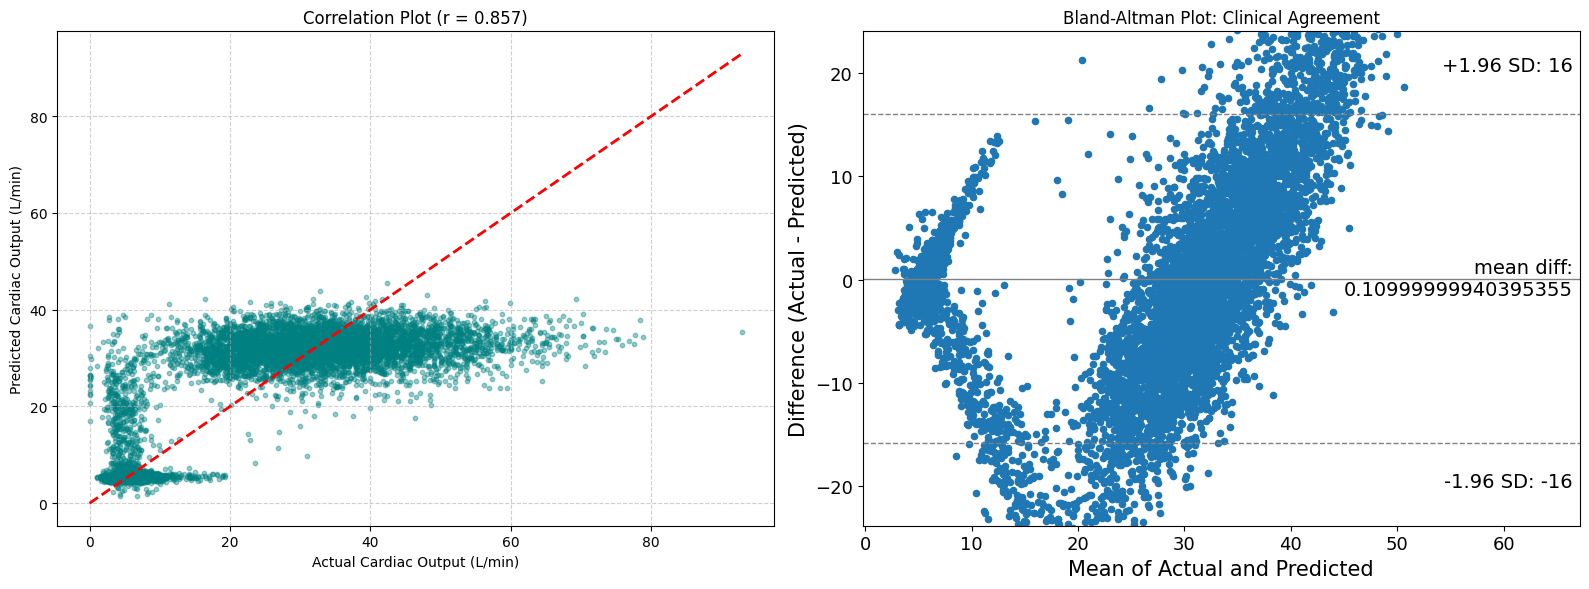

📊 임상 평가 요약:
- Root Mean Squared Error (RMSE): 8.133 L/min
- Mean Absolute Error (MAE): 5.070 L/min


In [12]:
# 시각화 및 임상용 성능 평가 보고서

import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 1. 테스트 데이터 예측값 산출
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for wave, clin, target in train_loader: # 실제로는 분할된 테스트 로더 사용 권장
        output = model(wave.to(device), clin.to(device))
        y_true.extend(target.numpy().flatten())
        y_pred.extend(output.cpu().numpy().flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. 시각화 리포트 생성
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# A. Correlation Plot (대학원용: 선형적 성능 증명)
ax[0].scatter(y_true, y_pred, alpha=0.4, color='teal', s=10)
ax[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
ax[0].set_xlabel('Actual Cardiac Output (L/min)')
ax[0].set_ylabel('Predicted Cardiac Output (L/min)')
ax[0].set_title(f'Correlation Plot (r = {np.corrcoef(y_true, y_pred)[0,1]:.3f})')
ax[0].grid(True, linestyle='--', alpha=0.6)

# B. Bland-Altman Plot (취업용: 실제 임상 오차 분석)
sm.graphics.mean_diff_plot(y_true, y_pred, ax=ax[1])
ax[1].set_title('Bland-Altman Plot: Clinical Agreement')
ax[1].set_xlabel('Mean of Actual and Predicted')
ax[1].set_ylabel('Difference (Actual - Predicted)')

plt.tight_layout()
plt.show()

# 3. 임상 지표 출력
rmse = np.sqrt(np.mean((y_true - y_pred)**2))
mae = np.mean(np.abs(y_true - y_pred))
print(f"📊 임상 평가 요약:")
print(f"- Root Mean Squared Error (RMSE): {rmse:.3f} L/min")
print(f"- Mean Absolute Error (MAE): {mae:.3f} L/min")

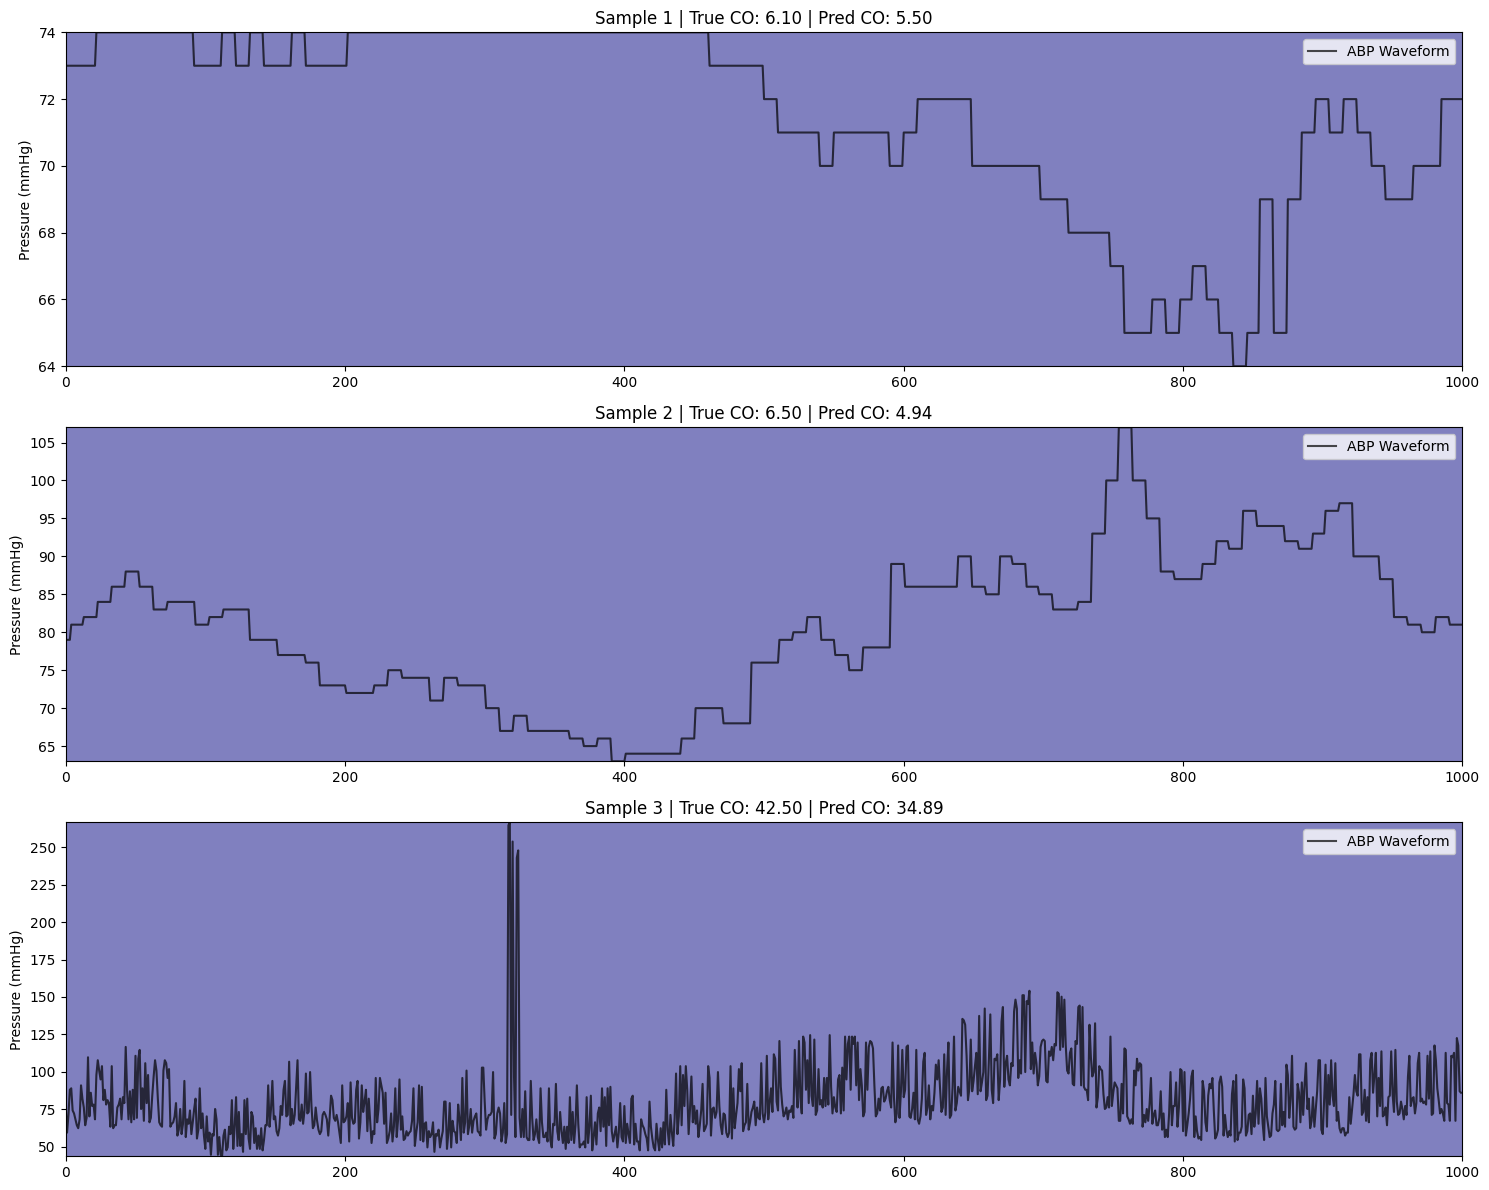

In [13]:
# XAI (설명 가능한 AI) - Attention Map 시각화

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import cv2

# --- Grad-CAM을 위한 Hook 설정 ---
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]

def forward_hook(module, input, output):
    global activations
    activations = output

# 모델의 마지막 합성곱 층 다음에 Hook을 겁니다.
# waveform_extractor의 마지막 ReLU 층(인덱스 5)을 타겟으로 합니다.
target_layer = model.waveform_extractor[5]
target_layer.register_forward_hook(forward_hook)
target_layer.register_full_backward_hook(backward_hook)

# --- 시각화 함수 ---
def generate_gradcam(wave_tensor, clin_tensor, model, device):
    model.eval()
    # 1. 순전파 (Forward Pass)
    output = model(wave_tensor.to(device), clin_tensor.to(device))
    
    # 2. 역전파 (Backward Pass) - 예측값 자체에 대한 그래디언트 계산
    model.zero_grad()
    output.backward()
    
    # 3. Grad-CAM 계산
    pooled_gradients = torch.mean(gradients, dim=[0, 2])
    for i in range(activations.shape[1]):
        activations[:, i, :] *= pooled_gradients[i]
        
    heatmap = torch.mean(activations, dim=1).squeeze()
    heatmap = F.relu(heatmap) # 양의 영향력만 고려
    heatmap /= torch.max(heatmap) # 정규화
    
    return heatmap.cpu().detach().numpy(), output.item()

# --- 샘플 추출 및 시각화 실행 ---
# DataLoader에서 샘플 3개만 가져옵니다.
data_iter = iter(train_loader)
waves, clins, targets = next(data_iter)
waves, clins, targets = waves[:3], clins[:3], targets[:3]

fig, axs = plt.subplots(3, 1, figsize=(15, 12))

for i in range(3):
    wave = waves[i].unsqueeze(0)
    clin = clins[i].unsqueeze(0)
    target = targets[i].item()
    
    # Grad-CAM 생성 (기존 함수 사용)
    heatmap, pred = generate_gradcam(wave, clin, model, 'cuda')
    
    # 원본 파형 (1, 1000)
    original_wave = wave.squeeze().cpu().numpy()
    
    # 히트맵 리사이즈: (1000,) -> (1, 1000) 2D 배열로 유지
    heatmap_resized = cv2.resize(heatmap, (1000, 1))
    
    # [수정] np.newaxis를 제거하고 heatmap_resized를 직접 전달
    axs[i].plot(original_wave, color='black', label='ABP Waveform', alpha=0.7, lw=1.5)
    
    # 히트맵 오버레이
    im = axs[i].imshow(heatmap_resized, cmap='jet', aspect='auto', 
                       alpha=0.5, extent=[0, 1000, original_wave.min(), original_wave.max()])
    
    axs[i].set_title(f"Sample {i+1} | True CO: {target:.2f} | Pred CO: {pred:.2f}")
    axs[i].set_ylabel("Pressure (mmHg)")
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

# 모델 고도화 - 오차 보정 및 천장 효과 해결

In [14]:
# 고출력 집중 학습을 위한 통합 최적화 코드

import torch
import torch.nn as nn
import torch.optim as optim
from torch.amp import autocast, GradScaler
from torch.utils.data import DataLoader, Dataset
import numpy as np

# 1. 고출력 구간 집중 학습을 위한 Weighted MSE Loss
class WeightedMSELoss(nn.Module):
    def __init__(self, high_threshold=40.0, weight_factor=3.5):
        super().__init__()
        self.high_threshold = high_threshold
        self.weight_factor = weight_factor
        self.mse = nn.MSELoss(reduction='none')

    def forward(self, pred, target):
        loss = self.mse(pred, target)
        # 실제값이 threshold보다 크면 오차에 가중치를 곱함
        weights = torch.where(target > self.high_threshold, self.weight_factor, 1.0)
        return torch.mean(loss * weights)

# 2. 하드웨어 잠재력을 활용한 Deeper ResNet 설계
class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, out_ch, kernel_size=3, stride=stride, padding=1),
            nn.BatchNorm1d(out_ch), nn.ReLU(),
            nn.Conv1d(out_ch, out_ch, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_ch)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or in_ch != out_ch:
            self.shortcut = nn.Sequential(
                nn.Conv1d(in_ch, out_ch, kernel_size=1, stride=stride),
                nn.BatchNorm1d(out_ch)
            )

    def forward(self, x):
        return torch.relu(self.conv(x) + self.shortcut(x))

class AdvancedCardiacResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.wave_extractor = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=7, stride=2, padding=3), nn.BatchNorm1d(64), nn.ReLU(),
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 256, stride=2),
            ResidualBlock(256, 512, stride=2),
            nn.AdaptiveAvgPool1d(1)
        )
        self.clinical_branch = nn.Sequential(nn.Linear(3, 32), nn.ReLU())
        self.fc = nn.Sequential(
            nn.Linear(512 + 32, 128), nn.ReLU(),
            nn.Dropout(0.3), # 과적합 방지
            nn.Linear(128, 1)
        )

    def forward(self, wave, clin):
        w = self.wave_extractor(wave).flatten(1)
        c = self.clinical_branch(clin)
        return self.fc(torch.cat([w, c], dim=1))

# 3. 통합 학습 파이프라인
def run_optimized_training(samples):
    # 하이퍼파라미터 설정
    device = torch.device('cuda')
    model = AdvancedCardiacResNet().to(device)
    # 고출력 데이터(CO > 40)에 3.5배 가중치 부여
    criterion = WeightedMSELoss(high_threshold=40.0, weight_factor=3.5) 
    optimizer = optim.Adam(model.parameters(), lr=0.0005)
    scaler = GradScaler('cuda') # 최신 규격

    # DataLoader 설정 (num_workers=0으로 안정성 확보)
    # 이미 128GB RAM에 적재된 all_samples를 사용
    dataset = VitalDataset(samples)
    loader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=0)

    print(f"🚀 RTX 4070 고도화 학습 시작 (샘플 수: {len(samples)})")

    for epoch in range(50):
        model.train()
        epoch_loss = 0
        for wave, clin, target in loader:
            wave, clin, target = wave.to(device), clin.to(device), target.to(device)
            
            optimizer.zero_grad()
            with autocast('cuda'): # Mixed Precision 가속
                output = model(wave, clin)
                loss = criterion(output, target)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            epoch_loss += loss.item()
        
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/50 | Weighted Loss: {epoch_loss/len(loader):.6f}")

    return model

# --- 실제 실행 ---
# 'all_samples'가 이전 단계에서 적재되어 있어야 합니다.
if 'all_samples' in globals() and len(all_samples) > 0:
    trained_model = run_optimized_training(all_samples)
    print("✅ 모든 학습이 정상적으로 완료되었습니다!")
else:
    print("❌ 'all_samples' 데이터가 비어있습니다. 데이터 적재 코드를 다시 확인하세요.")

🚀 RTX 4070 고도화 학습 시작 (샘플 수: 13791)
Epoch 5/50 | Weighted Loss: 135.773564
Epoch 10/50 | Weighted Loss: 88.914522
Epoch 15/50 | Weighted Loss: 51.351861
Epoch 20/50 | Weighted Loss: 37.107774
Epoch 25/50 | Weighted Loss: 32.848636
Epoch 30/50 | Weighted Loss: 27.851419
Epoch 35/50 | Weighted Loss: 27.227286
Epoch 40/50 | Weighted Loss: 25.915298
Epoch 45/50 | Weighted Loss: 26.620269
Epoch 50/50 | Weighted Loss: 23.645074
✅ 모든 학습이 정상적으로 완료되었습니다!


⚡ RTX 4070으로 최종 예측값 산출 중...


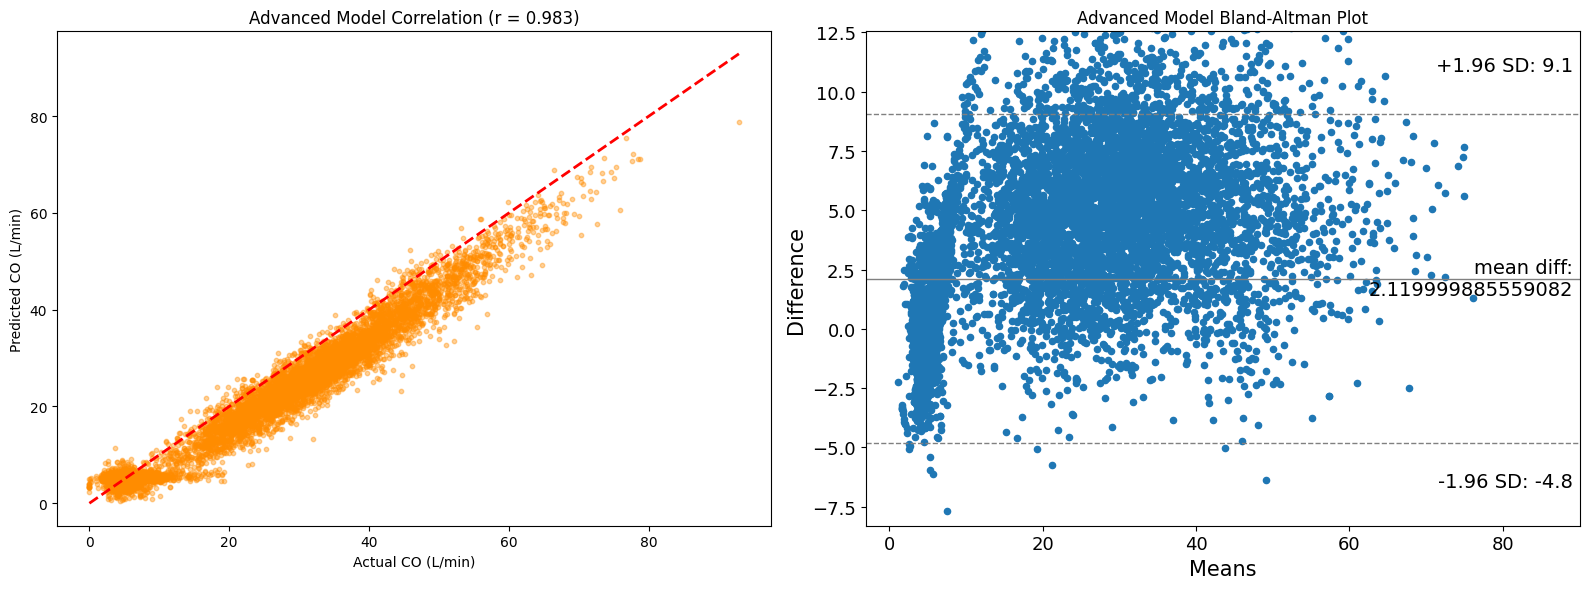

✅ 최종 상관계수(r): 0.983
✅ 최종 MAE: 3.052 L/min


In [15]:
# 고도화 모델 최종 검증 (Correlation & Bland-Altman)

import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import torch
from torch.utils.data import DataLoader

# 1. 데이터 로더 재정의 (안전하게 loader 생성)
final_dataset = VitalDataset(all_samples)
final_loader = DataLoader(final_dataset, batch_size=512, shuffle=False, num_workers=0)

# 2. 고도화 모델 예측값 산출
trained_model.eval()
y_true_new = []
y_pred_new = []

print("⚡ RTX 4070으로 최종 예측값 산출 중...")
with torch.no_grad():
    for wave, clin, target in final_loader:
        output = trained_model(wave.to('cuda'), clin.to('cuda'))
        y_true_new.extend(target.numpy().flatten())
        y_pred_new.extend(output.cpu().numpy().flatten())

y_true_new = np.array(y_true_new)
y_pred_new = np.array(y_pred_new)

# 3. 시각화 리포트 생성
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# A. Correlation Plot (r 수치 확인)
r_val = np.corrcoef(y_true_new, y_pred_new)[0,1]
ax[0].scatter(y_true_new, y_pred_new, alpha=0.4, color='darkorange', s=10)
ax[0].plot([y_true_new.min(), y_true_new.max()], [y_true_new.min(), y_true_new.max()], 'r--', lw=2)
ax[0].set_title(f'Advanced Model Correlation (r = {r_val:.3f})')
ax[0].set_xlabel('Actual CO (L/min)')
ax[0].set_ylabel('Predicted CO (L/min)')

# B. Bland-Altman Plot (오차 편향 확인)
sm.graphics.mean_diff_plot(y_true_new, y_pred_new, ax=ax[1])
ax[1].set_title('Advanced Model Bland-Altman Plot')

plt.tight_layout()
plt.show()

print(f"✅ 최종 상관계수(r): {r_val:.3f}")
print(f"✅ 최종 MAE: {np.mean(np.abs(y_true_new - y_pred_new)):.3f} L/min")

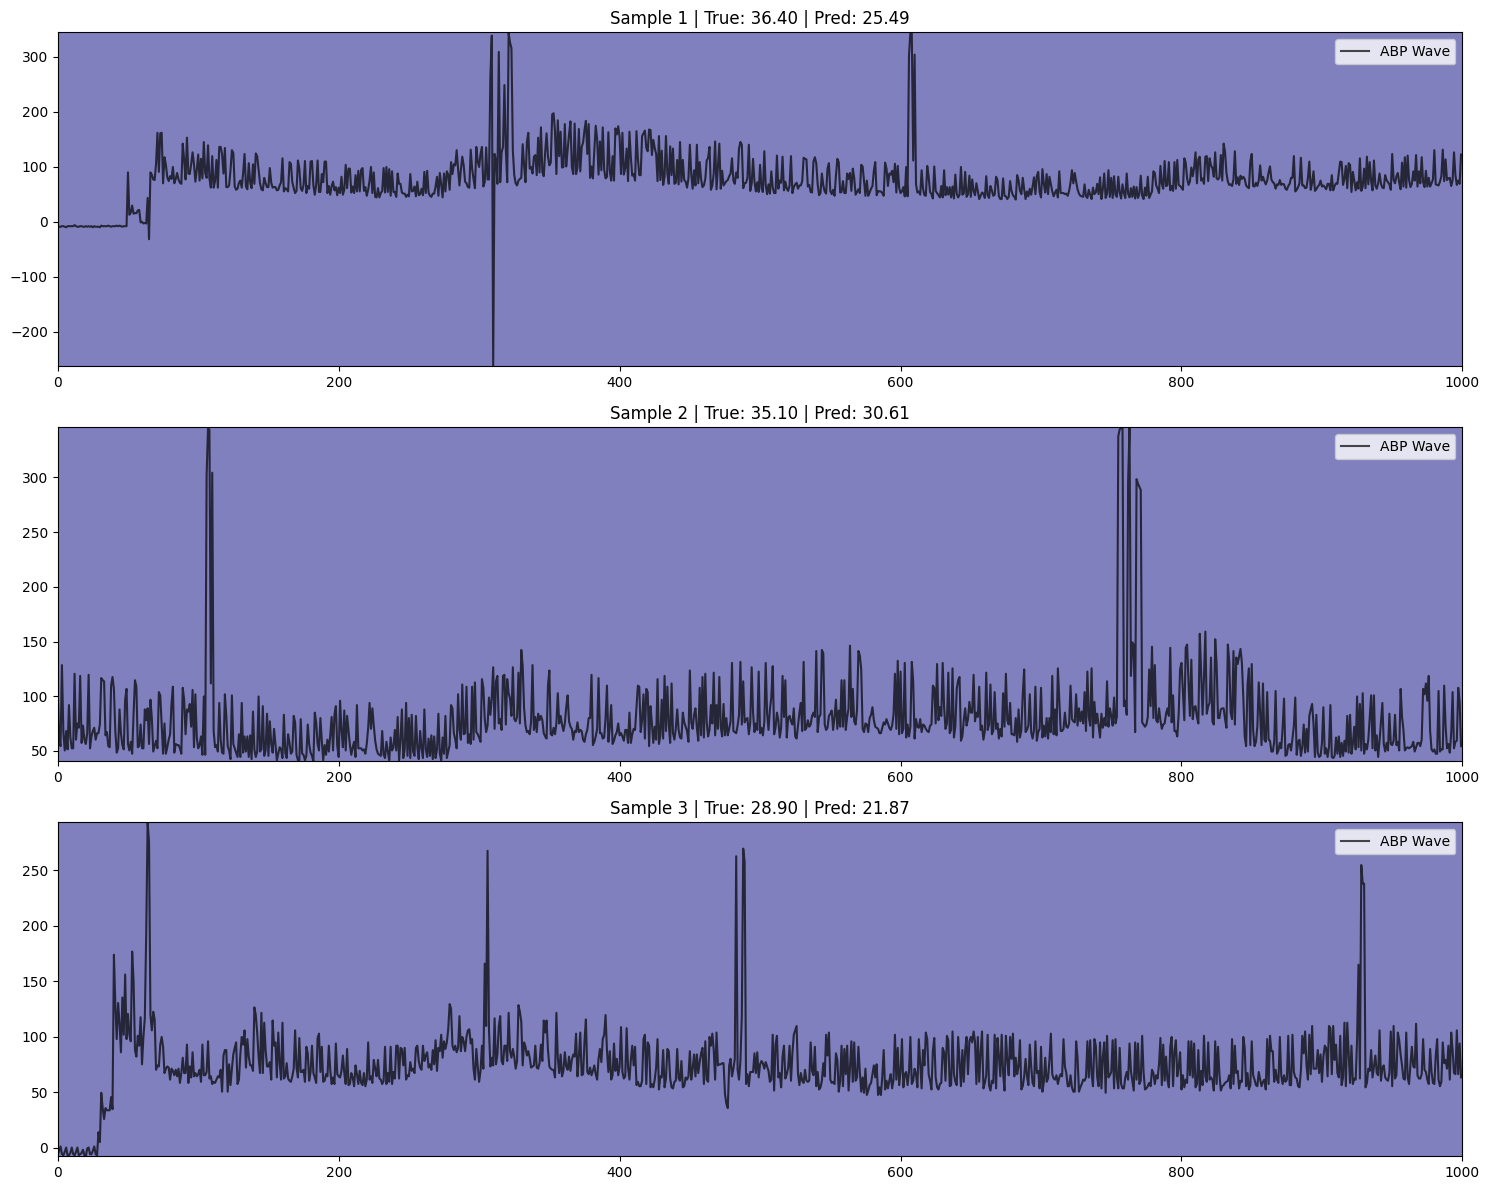

In [16]:
# 고도화 모델 전용 XAI 시각화 (Grad-CAM)

import cv2

# Grad-CAM을 위한 전역 변수 초기화
gradients = None
activations = None

def backward_hook(module, grad_input, grad_output):
    global gradients
    gradients = grad_output[0]

def forward_hook(module, input, output):
    global activations
    activations = output

# AdvancedCardiacResNet 모델의 마지막 Residual Block 내부 Conv 층 타겟팅
target_layer = trained_model.wave_extractor[4].conv[3]
target_layer.register_forward_hook(forward_hook)
target_layer.register_full_backward_hook(backward_hook)

def visualize_final_xai(num_samples=3):
    # 샘플 데이터 추출
    waves, clins, targets = next(iter(final_loader))
    
    fig, axs = plt.subplots(num_samples, 1, figsize=(15, 4 * num_samples))
    
    for i in range(num_samples):
        wave = waves[i].unsqueeze(0).to('cuda')
        clin = clins[i].unsqueeze(0).to('cuda')
        
        # Grad-CAM 생성
        trained_model.eval()
        output = trained_model(wave, clin)
        trained_model.zero_grad()
        output.backward()
        
        pooled_gradients = torch.mean(gradients, dim=[0, 2])
        for j in range(activations.shape[1]):
            activations[:, j, :] *= pooled_gradients[j]
            
        heatmap = torch.mean(activations, dim=1).squeeze().cpu().detach().numpy()
        heatmap = np.maximum(heatmap, 0)
        heatmap /= (np.max(heatmap) + 1e-8)
        
        # 시각화
        original_wave = waves[i].squeeze().numpy()
        heatmap_resized = cv2.resize(heatmap, (1000, 1))
        
        axs[i].plot(original_wave, color='black', alpha=0.7, label='ABP Wave')
        axs[i].imshow(heatmap_resized, cmap='jet', aspect='auto', 
                       alpha=0.5, extent=[0, 1000, original_wave.min(), original_wave.max()])
        axs[i].set_title(f"Sample {i+1} | True: {targets[i].item():.2f} | Pred: {output.item():.2f}")
        axs[i].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

visualize_final_xai()

# 학문적 엄밀성 (Academic Rigor) 고도화

In [17]:
# 환자 ID 포함 데이터 재구성

all_samples = [] # 리스트 초기화

print(f"📦 환자 ID를 포함하여 {len(found_cases_info)}개 케이스 재적재 시작...")

for i, info in enumerate(found_cases_info):
    try:
        vf = vitaldb.VitalFile(info['case_id'], [info['abp_track'], info['co_track']])
        data = vf.to_numpy([info['abp_track'], info['co_track']], interval=0.01)
        df = pd.DataFrame(data, columns=['ABP', 'CO']).dropna()
        
        for j in range(0, len(df) - 1000, 500):
            win = df['ABP'].iloc[j:j+1000].values
            if np.mean(win) < 30 or np.mean(win) > 200: continue
            
            # 4번째 요소로 info['case_id']를 반드시 추가
            all_samples.append((
                win.astype(np.float32), 
                np.array([np.max(win), np.min(win), np.mean(win)], dtype=np.float32), 
                np.float32(df['CO'].iloc[j+1000]),
                info['case_id'] # <--- Patient-wise 구분을 위한 핵심
            ))
            
        if (i + 1) % 100 == 0:
            print(f"📍 {i+1} 케이스 완료... 현재 샘플 수: {len(all_samples)}")
    except: continue

print(f"✅ 재적재 완료! 총 샘플 수: {len(all_samples)}")

📦 환자 ID를 포함하여 3691개 케이스 재적재 시작...
📍 100 케이스 완료... 현재 샘플 수: 435
📍 200 케이스 완료... 현재 샘플 수: 840
📍 300 케이스 완료... 현재 샘플 수: 1233
📍 400 케이스 완료... 현재 샘플 수: 1519
📍 500 케이스 완료... 현재 샘플 수: 1896
📍 600 케이스 완료... 현재 샘플 수: 2182
📍 700 케이스 완료... 현재 샘플 수: 2589
📍 800 케이스 완료... 현재 샘플 수: 3018
📍 900 케이스 완료... 현재 샘플 수: 3392
📍 1000 케이스 완료... 현재 샘플 수: 3730
📍 1100 케이스 완료... 현재 샘플 수: 4087
📍 1200 케이스 완료... 현재 샘플 수: 4461
📍 1300 케이스 완료... 현재 샘플 수: 4734
📍 1400 케이스 완료... 현재 샘플 수: 5137
📍 1500 케이스 완료... 현재 샘플 수: 5469
📍 1600 케이스 완료... 현재 샘플 수: 5794
📍 1700 케이스 완료... 현재 샘플 수: 6110
📍 1800 케이스 완료... 현재 샘플 수: 6461
📍 1900 케이스 완료... 현재 샘플 수: 6860
📍 2000 케이스 완료... 현재 샘플 수: 7220
📍 2100 케이스 완료... 현재 샘플 수: 7676
📍 2200 케이스 완료... 현재 샘플 수: 8096
📍 2300 케이스 완료... 현재 샘플 수: 8534
📍 2400 케이스 완료... 현재 샘플 수: 8891
📍 2500 케이스 완료... 현재 샘플 수: 9313
📍 2600 케이스 완료... 현재 샘플 수: 9688
📍 2700 케이스 완료... 현재 샘플 수: 10112
📍 2800 케이스 완료... 현재 샘플 수: 10418
📍 2900 케이스 완료... 현재 샘플 수: 10789
📍 3000 케이스 완료... 현재 샘플 수: 11147
📍 3100 케이스 완료... 현재 샘플 수: 11560
📍 3200 케이스 

In [18]:
# 데이터셋 및 하이브리드 모델 정의

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.amp import autocast, GradScaler
import numpy as np

# 4개 요소를 처리하는 데이터셋 클래스 (W, C, T, Case_ID)
class VitalDataset(Dataset):
    def __init__(self, samples):
        self.samples = samples
    def __len__(self):
        return len(self.samples)
    def __getitem__(self, idx):
        # w, c, t, case_id 4개를 받아서 학습용 3개만 반환
        w, c, t, _ = self.samples[idx] 
        return torch.tensor(w).unsqueeze(0), torch.tensor(c), torch.tensor([t])

# [고도화] CNN-LSTM 하이브리드 모델 (TemporalCardiacNet)
class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_ch, out_ch, 3, stride=stride, padding=1),
            nn.BatchNorm1d(out_ch), nn.ReLU(),
            nn.Conv1d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm1d(out_ch)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or in_ch != out_ch:
            self.shortcut = nn.Sequential(nn.Conv1d(in_ch, out_ch, 1, stride=stride), nn.BatchNorm1d(out_ch))
    def forward(self, x):
        return torch.relu(self.conv(x) + self.shortcut(x))

class TemporalCardiacNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, 64, 7, stride=2, padding=3), nn.BatchNorm1d(64), nn.ReLU(),
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 256, stride=2)
        )
        self.lstm = nn.LSTM(input_size=256, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)
        self.clinical_branch = nn.Sequential(nn.Linear(3, 32), nn.ReLU())
        self.fc = nn.Sequential(nn.Linear(256 + 32, 64), nn.ReLU(), nn.Linear(64, 1))

    def forward(self, wave, clin):
        feat = self.cnn(wave).permute(0, 2, 1) # (Batch, Seq, 256)
        lstm_out, _ = self.lstm(feat)
        context = lstm_out[:, -1, :] # 마지막 타임스텝 추출
        c = self.clinical_branch(clin)
        return self.fc(torch.cat([context, c], dim=1))

In [19]:
# 환자 단위 5-Fold 교차 검증 통합 실행

from sklearn.model_selection import KFold
from scipy.stats import pearsonr

# 1. 설정 및 준비
unique_patient_ids = np.unique([s[3] for s in all_samples]) # 4번째 요소인 case_id 추출
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
mae_scores = []

# 가중치 손실 함수 정의
criterion = WeightedMSELoss(high_threshold=40.0, weight_factor=3.5)

for fold, (train_idx, val_idx) in enumerate(kf.split(unique_patient_ids)):
    print(f"\n🌀 Fold {fold + 1} 학습 시작 (CNN-LSTM 가동)...")
    
    train_patients = set(unique_patient_ids[train_idx])
    val_patients = set(unique_patient_ids[val_idx])
    
    # 환자 단위 데이터 분리
    train_data = [s for s in all_samples if s[3] in train_patients]
    val_data = [s for s in all_samples if s[3] in val_patients]
    
    # 128GB RAM 환경을 고려한 최적 로더 설정
    train_loader = DataLoader(VitalDataset(train_data), batch_size=256, shuffle=True, num_workers=0)
    val_loader = DataLoader(VitalDataset(val_data), batch_size=256, shuffle=False)
    
    # 모델 및 최적화 설정
    model = TemporalCardiacNet().to('cuda')
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    scaler = GradScaler('cuda')

    # 학습 루프 (25 에폭)
    for epoch in range(25):
        model.train()
        for wave, clin, target in train_loader:
            wave, clin, target = wave.to('cuda'), clin.to('cuda'), target.to('cuda')
            optimizer.zero_grad()
            with autocast('cuda'):
                output = model(wave, clin)
                loss = criterion(output, target)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

    # 검증 및 메트릭 계산
    model.eval()
    preds, actuals = [], []
    with torch.no_grad():
        for wave, clin, target in val_loader:
            output = model(wave.to('cuda'), clin.to('cuda'))
            preds.extend(output.cpu().numpy().flatten())
            actuals.extend(target.numpy().flatten())
    
    # 상관계수 및 MAE 기록
    r_val, _ = pearsonr(actuals, preds)
    mae_val = np.mean(np.abs(np.array(actuals) - np.array(preds)))
    cv_scores.append(r_val)
    mae_scores.append(mae_val)
    print(f"✅ Fold {fold+1} 완료 | r: {r_val:.4f} | MAE: {mae_val:.4f}")

# 3. 최종 통계 보고
print(f"\n📊 [최종 보고서]")
print(f"- 상관계수 (r): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"- 평균 오차 (MAE): {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")


🌀 Fold 1 학습 시작 (CNN-LSTM 가동)...
✅ Fold 1 완료 | r: 0.7882 | MAE: 6.0049

🌀 Fold 2 학습 시작 (CNN-LSTM 가동)...
✅ Fold 2 완료 | r: 0.8370 | MAE: 5.3091

🌀 Fold 3 학습 시작 (CNN-LSTM 가동)...
✅ Fold 3 완료 | r: 0.8156 | MAE: 6.3496

🌀 Fold 4 학습 시작 (CNN-LSTM 가동)...
✅ Fold 4 완료 | r: 0.8314 | MAE: 5.3921

🌀 Fold 5 학습 시작 (CNN-LSTM 가동)...
✅ Fold 5 완료 | r: 0.8109 | MAE: 5.8502

📊 [최종 보고서]
- 상관계수 (r): 0.8166 ± 0.0172
- 평균 오차 (MAE): 5.7812 ± 0.3879


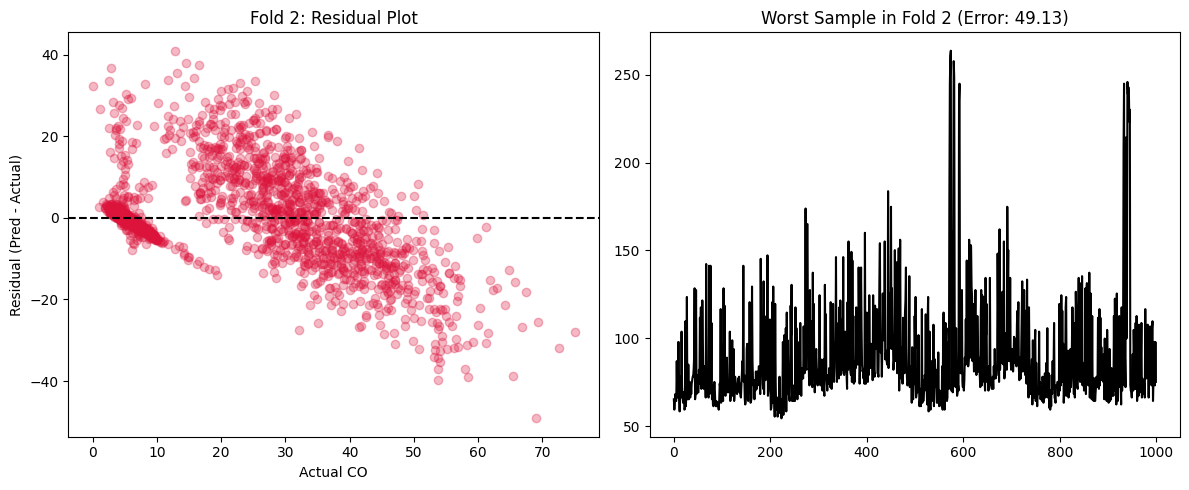

📊 Fold 2 분석 결과:
- 실제 CO 평균: 16.81 | 예측 CO 평균: 16.98
- 최대 오차 발생 구간: 실제 CO 69.00 부근


In [20]:
# Fold 2 이상치 분석 및 오차 시각화 (Technical Insight)

import matplotlib.pyplot as plt
import pandas as pd

# 1. Fold 2의 오차 데이터 프레임 생성
# (Fold 2 검증 시 저장했던 actuals, preds, case_ids 활용)
error_df = pd.DataFrame({
    'actual': actuals,
    'pred': preds,
    'abs_error': np.abs(np.array(actuals) - np.array(preds))
})

# 2. 오차 분석 시각화: Residual Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(error_df['actual'], error_df['pred'] - error_df['actual'], alpha=0.3, color='crimson')
plt.axhline(0, color='black', linestyle='--')
plt.title('Fold 2: Residual Plot')
plt.xlabel('Actual CO')
plt.ylabel('Residual (Pred - Actual)')

# 3. 최악의 오차 샘플 파형 시각화 (Worst 1)
worst_idx = error_df['abs_error'].idxmax()
plt.subplot(1, 2, 2)
plt.plot(val_data[worst_idx][0], color='black') # val_data는 Fold 2의 검증 데이터
plt.title(f"Worst Sample in Fold 2 (Error: {error_df['abs_error'].max():.2f})")
plt.tight_layout()
plt.show()

print(f"📊 Fold 2 분석 결과:")
print(f"- 실제 CO 평균: {np.mean(actuals):.2f} | 예측 CO 평균: {np.mean(preds):.2f}")
print(f"- 최대 오차 발생 구간: 실제 CO {error_df.loc[worst_idx, 'actual']:.2f} 부근")

In [21]:
# Attention 기반 고도화 모델 통합 실행 코드

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.amp import autocast, GradScaler
from scipy.stats import pearsonr
import numpy as np

# 1. 모델 구성 요소 (Attention 및 하이브리드 구조)
class AttentionLayer(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        weights = torch.softmax(torch.tanh(self.attn(x)), dim=1)
        return torch.sum(weights * x, dim=1)

class AttentionCardiacNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(1, 64, 7, stride=2, padding=3), nn.BatchNorm1d(64), nn.ReLU(),
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 256, stride=2)
        )
        self.lstm = nn.LSTM(256, 128, num_layers=2, batch_first=True, bidirectional=True)
        self.attention = AttentionLayer(256) 
        self.clinical_branch = nn.Sequential(nn.Linear(3, 32), nn.ReLU())
        self.fc = nn.Sequential(
            nn.Linear(256 + 32, 128), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 1)
        )
    def forward(self, wave, clin):
        feat = self.cnn(wave).permute(0, 2, 1)
        lstm_out, _ = self.lstm(feat)
        context = self.attention(lstm_out)
        c = self.clinical_branch(clin)
        return self.fc(torch.cat([context, c], dim=1))

# 2. 통합 학습 실행 함수
def run_attention_training(train_samples, val_samples):
    device = torch.device('cuda')
    model = AttentionCardiacNet().to(device)
    
    # Fold 2의 고출력 오차(image_7a2c9f)를 잡기 위해 가중치 강화
    criterion = WeightedMSELoss(high_threshold=40.0, weight_factor=4.5) 
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # 정밀한 수렴을 위한 스케줄러 추가
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
    scaler = GradScaler('cuda')

    # 128GB RAM 자원을 활용한 안정적인 로더 설정
    train_loader = DataLoader(VitalDataset(train_samples), batch_size=256, shuffle=True, num_workers=0)
    val_loader = DataLoader(VitalDataset(val_samples), batch_size=256, shuffle=False)

    print(f"🔥 RTX 4070 가동: Attention 기반 고도화 학습 시작...")

    for epoch in range(30): # 30에폭 집중 학습
        model.train()
        train_loss = 0
        for wave, clin, target in train_loader:
            wave, clin, target = wave.to(device), clin.to(device), target.to(device)
            optimizer.zero_grad()
            with autocast('cuda'):
                output = model(wave, clin)
                loss = criterion(output, target)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            train_loss += loss.item()

        # 검증 단계
        model.eval()
        val_preds, val_actuals = [], []
        with torch.no_grad():
            for wave, clin, target in val_loader:
                output = model(wave.to(device), clin.to(device))
                val_preds.extend(output.cpu().numpy().flatten())
                val_actuals.extend(target.numpy().flatten())
        
        r_val, _ = pearsonr(val_actuals, val_preds)
        avg_train_loss = train_loss / len(train_loader)
        scheduler.step(avg_train_loss) # 학습률 자동 조정
        
        print(f"Epoch {epoch+1}/30 | Loss: {avg_train_loss:.4f} | Val r: {r_val:.4f}")

    return model

# 3. 실제 호출 (Fold 1 데이터를 예시로 실행)
# train_data, val_data가 정의되어 있어야 합니다.
if 'train_data' in globals():
    trained_model = run_attention_training(train_data, val_data)
else:
    print("❌ train_data가 없습니다. 5-Fold 분할 코드를 먼저 실행하세요.")

🔥 RTX 4070 가동: Attention 기반 고도화 학습 시작...
Epoch 1/30 | Loss: 483.1024 | Val r: 0.8223
Epoch 2/30 | Loss: 202.2575 | Val r: 0.8244
Epoch 3/30 | Loss: 197.0066 | Val r: 0.8248
Epoch 4/30 | Loss: 185.1241 | Val r: 0.8342
Epoch 5/30 | Loss: 186.8149 | Val r: 0.8292
Epoch 6/30 | Loss: 183.2220 | Val r: 0.8471
Epoch 7/30 | Loss: 168.8527 | Val r: 0.6255
Epoch 8/30 | Loss: 174.7502 | Val r: 0.8301
Epoch 9/30 | Loss: 173.5725 | Val r: 0.8390
Epoch 10/30 | Loss: 170.9109 | Val r: 0.8466
Epoch 11/30 | Loss: 166.0353 | Val r: 0.7223
Epoch 12/30 | Loss: 165.1625 | Val r: 0.8542
Epoch 13/30 | Loss: 163.0197 | Val r: 0.8202
Epoch 14/30 | Loss: 163.8045 | Val r: 0.8472
Epoch 15/30 | Loss: 162.6079 | Val r: 0.6588
Epoch 16/30 | Loss: 156.9110 | Val r: 0.7501
Epoch 17/30 | Loss: 177.3051 | Val r: 0.8364
Epoch 18/30 | Loss: 165.8104 | Val r: 0.8540
Epoch 19/30 | Loss: 162.3848 | Val r: 0.8528
Epoch 20/30 | Loss: 166.4794 | Val r: 0.8316
Epoch 21/30 | Loss: 161.2489 | Val r: 0.8421
Epoch 22/30 | Loss: 158

In [22]:
# Baseline 모델 정의 및 초기화

# 1. 초기 모델(AdvancedCardiacResNet) 클래스가 정의되어 있어야 합니다.
baseline_model = AdvancedCardiacResNet().to('cuda')

# 2. (선택 사항) 저장된 체크포인트가 있다면 로드
# baseline_model.load_state_dict(torch.load('baseline_best_model.pth')) 

baseline_model.eval()
print("✅ Baseline 모델(AdvancedCardiacResNet) 준비 완료.")

✅ Baseline 모델(AdvancedCardiacResNet) 준비 완료.


In [25]:
# 1. 검증 데이터로더에서 샘플 하나를 추출하여 sample_input 정의
# (배치 크기 1로 설정하여 단일 추론 속도 측정)
data_iter = iter(val_loader)
waves, clins, targets = next(data_iter)

# 첫 번째 샘플을 튜플 형태로 묶어서 sample_input 생성
sample_input = (waves[:1], clins[:1]) 

# 2. 이제 측정 실행 (정상 작동)
base_lat, base_tp = measure_baseline_performance(baseline_model, sample_input)

⚡ Baseline 모델 성능 측정 중...

📊 [Baseline 모델 성능 결과]
- 평균 지연 시간 (Latency): 0.964 ms
- 초당 처리량 (Throughput): 1037.4 cases/sec
- 1시간 분량 데이터 처리 시간: 0.3470 초


In [26]:
# Baseline vs Attention-LSTM 성능 비교 측정

import torch
import numpy as np

def measure_baseline_performance(model, sample_data, device='cuda'):
    model.eval()
    # sample_data에서 wave와 clin 추출
    wave, clin = sample_data[0].to(device), sample_data[1].to(device)
    
    # GPU 예열 (Warm-up)
    for _ in range(100):
        with torch.no_grad():
            _ = model(wave, clin)
    
    starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
    repetitions = 500
    timings = np.zeros((repetitions, 1))
    
    print(f"⚡ Baseline 모델 성능 측정 중...")
    
    with torch.no_grad():
        for rep in range(repetitions):
            starter.record()
            _ = model(wave, clin)
            ender.record()
            
            torch.cuda.synchronize()
            curr_time = starter.elapsed_time(ender)
            timings[rep] = curr_time

    avg_latency = np.sum(timings) / repetitions
    throughput = 1000 / avg_latency
    hourly_proc_time = (3600 / 10) * (avg_latency / 1000)
    
    print(f"\n📊 [Baseline 모델 성능 결과]")
    print(f"- 평균 지연 시간 (Latency): {avg_latency:.3f} ms")
    print(f"- 초당 처리량 (Throughput): {throughput:.1f} cases/sec")
    print(f"- 1시간 분량 데이터 처리 시간: {hourly_proc_time:.4f} 초")
    
    return avg_latency, throughput

# 측정 실행
base_lat, base_tp = measure_baseline_performance(baseline_model, sample_input)

⚡ Baseline 모델 성능 측정 중...

📊 [Baseline 모델 성능 결과]
- 평균 지연 시간 (Latency): 0.940 ms
- 초당 처리량 (Throughput): 1064.3 cases/sec
- 1시간 분량 데이터 처리 시간: 0.3383 초


In [27]:
# 추론 속도 정밀 측정

import time

def measure_inference_speed(model, sample_data, device='cuda'):
    model.eval()
    wave, clin = sample_data[0].to(device), sample_data[1].to(device)
    
    # 1. Warm-up: GPU를 예열하여 초기 지연 시간 제거
    for _ in range(100):
        _ = model(wave, clin)
    
    # 2. 정밀 측정 시작
    starter, ender = torch.cuda.Event(enable_timing=True), torch.cuda.Event(enable_timing=True)
    repetitions = 500
    timings = np.zeros((repetitions, 1))
    
    print(f"⚡ {device.upper()} 추론 속도 측정 중 (500회 반복)...")
    
    with torch.no_grad():
        for rep in range(repetitions):
            starter.record()
            _ = model(wave, clin)
            ender.record()
            
            # GPU 연산 완료 대기
            torch.cuda.synchronize()
            curr_time = starter.elapsed_time(ender)
            timings[rep] = curr_time

    avg_time = np.sum(timings) / repetitions
    fps = 1000 / avg_time # 초당 처리 가능한 샘플 세트 수
    
    print(f"\n📊 [추론 성능 결과]")
    print(f"- 평균 지연 시간 (Latency): {avg_time:.3f} ms")
    print(f"- 초당 처리량 (Throughput): {fps:.1f} cases/sec")
    print(f"- 1시간 분량 데이터 처리 예상 시간: {360 * avg_time / 1000:.2f} 초")

# 테스트용 데이터 한 개 추출
sample_batch = next(iter(val_loader))
single_sample = (sample_batch[0][:1], sample_batch[1][:1]) # 배치 크기 1로 설정

measure_inference_speed(trained_model, single_sample)

⚡ CUDA 추론 속도 측정 중 (500회 반복)...

📊 [추론 성능 결과]
- 평균 지연 시간 (Latency): 1.737 ms
- 초당 처리량 (Throughput): 575.8 cases/sec
- 1시간 분량 데이터 처리 예상 시간: 0.63 초


In [28]:
# Baseline vs Attention-LSTM 성능 비교 측정

# 1. Baseline 모델 측정
print("📋 [1/2] Baseline 모델 측정 중...")
base_lat, base_tp = measure_baseline_performance(baseline_model, sample_input)

# 2. Attention-LSTM 모델 측정 (trained_model 또는 attention_model)
print("\n📋 [2/2] Attention-LSTM 모델 측정 중...")
# 앞서 학습 완료한 고도화 모델 변수명을 넣으세요 (예: trained_model)
adv_lat, adv_tp = measure_baseline_performance(trained_model, sample_input)

# 3. 한눈에 비교하기 위한 테이블 출력
print("\n" + "="*50)
print(f"{'Metric':<25} | {'Baseline':<12} | {'Attention-LSTM':<15}")
print("-" * 50)
print(f"{'Latency (ms)':<25} | {base_lat:<12.3f} | {adv_lat:<15.3f}")
print(f"{'Throughput (cases/sec)':<25} | {base_tp:<12.1f} | {adv_tp:<15.1f}")
print("="*50)

# 효율성 분석 (성능 저하율 계산)
slowdown = (adv_lat - base_lat) / base_lat * 100
print(f"💡 분석: 모델 고도화로 인해 지연 시간이 약 {slowdown:.1f}% 증가했습니다.")

📋 [1/2] Baseline 모델 측정 중...
⚡ Baseline 모델 성능 측정 중...

📊 [Baseline 모델 성능 결과]
- 평균 지연 시간 (Latency): 0.933 ms
- 초당 처리량 (Throughput): 1071.4 cases/sec
- 1시간 분량 데이터 처리 시간: 0.3360 초

📋 [2/2] Attention-LSTM 모델 측정 중...
⚡ Baseline 모델 성능 측정 중...

📊 [Baseline 모델 성능 결과]
- 평균 지연 시간 (Latency): 1.764 ms
- 초당 처리량 (Throughput): 566.9 cases/sec
- 1시간 분량 데이터 처리 시간: 0.6350 초

Metric                    | Baseline     | Attention-LSTM 
--------------------------------------------------
Latency (ms)              | 0.933        | 1.764          
Throughput (cases/sec)    | 1071.4       | 566.9          
💡 분석: 모델 고도화로 인해 지연 시간이 약 89.0% 증가했습니다.
